In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
#ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [5]:
df.index.freq='D'

In [6]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [8]:
df.info

<bound method DataFrame.info of               weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                         
2016-01-01     Friday        1  New Year's Day   65.0   25.0   67.0  139.0   
2016-01-02   Saturday        0              na   24.0   39.0   43.0   85.0   
2016-01-03     Sunday        0              na   24.0   31.0   66.0   81.0   
2016-01-04     Monday        0              na   23.0   18.0   32.0   32.0   
2016-01-05    Tuesday        0              na    2.0   15.0   38.0   43.0   
...               ...      ...             ...    ...    ...    ...    ...   
2017-05-27   Saturday        0              na    NaN    NaN    NaN    NaN   
2017-05-28     Sunday        0              na    NaN    NaN    NaN    NaN   
2017-05-29     Monday        1    Memorial Day    NaN    NaN    NaN    NaN   
2017-05-30    Tuesday        0              na    NaN    NaN    NaN    NaN   
2017-05-31  Wednesday        0  

In [9]:
df1 = df.dropna()

In [10]:
df.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [11]:
cols = ['rest1', 'rest2', 'rest3',
       'rest4', 'total']

In [15]:
for column in cols:
    df1[column]=df1[column].astype(int)

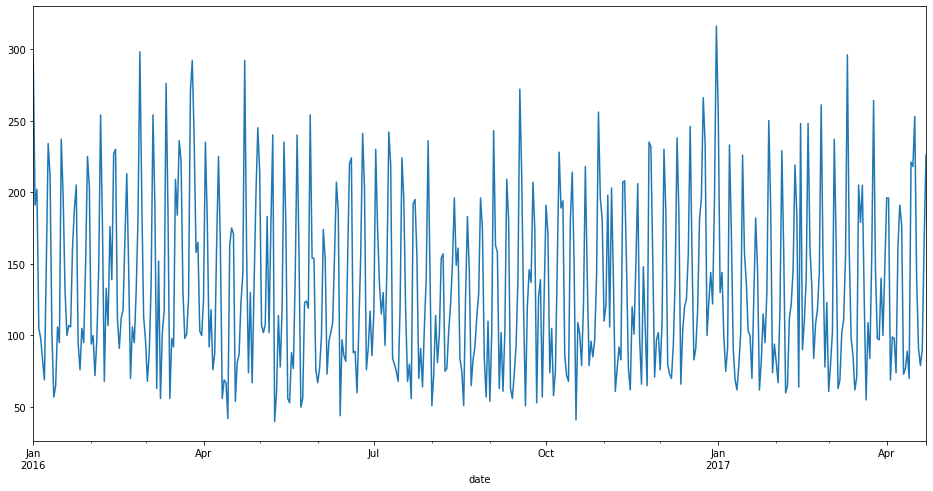

In [16]:
df1['total'].plot(figsize=(16,8))

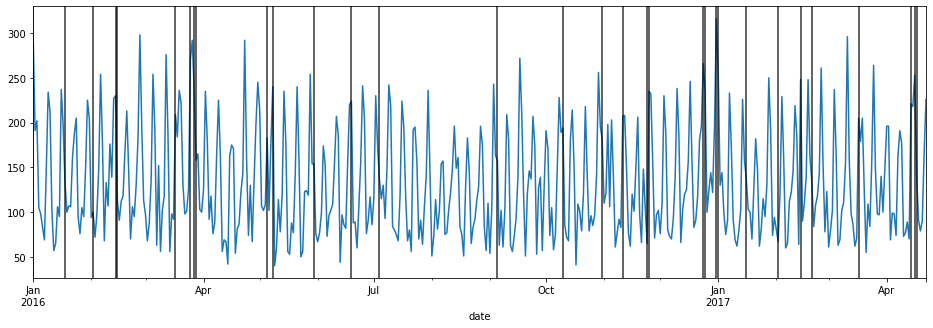

In [18]:
ax = df1['total'].plot(figsize=(16,5))

for day in df1[df1['holiday']==1].index:
    ax.axvline(x=day,color='black',alpha=0.8);

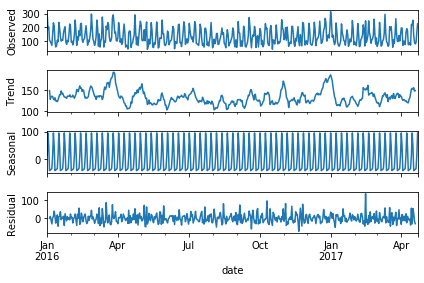

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1['total']).plot()

In [23]:
train = df1.iloc[:436]

In [24]:
test = df1.iloc[436:]

In [25]:
from pmdarima import auto_arima

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
auto_arima(df1['total'],seasonal=True,m=7,trace=True).summary()

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=4935.684, BIC=4969.040, Fit time=1.851 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=5269.484, BIC=5277.823, Fit time=0.018 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=4916.749, BIC=4933.428, Fit time=0.541 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=5049.644, BIC=5066.322, Fit time=0.382 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=5200.790, BIC=5213.298, Fit time=0.108 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4845.442, BIC=4866.290, Fit time=1.427 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4859.638, BIC=4876.316, Fit time=1.745 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4845.649, BIC=4870.667, Fit time=2.051 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Sun, 19 Apr 2020   AIC                           4845.442
Time:                                   12:31:00   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5662      4.363      4.714      0.000      12.015      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.3967     86.679     16.468      0.000    1257.510    1597.283
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
model = SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7),
                enforce_invertibility=False)

In [33]:
start = len(train)

end = len(train) + len(test) - 1

In [34]:
results = model.fit()

In [35]:
predictions = results.predict(start,end).rename('SARIMA model')

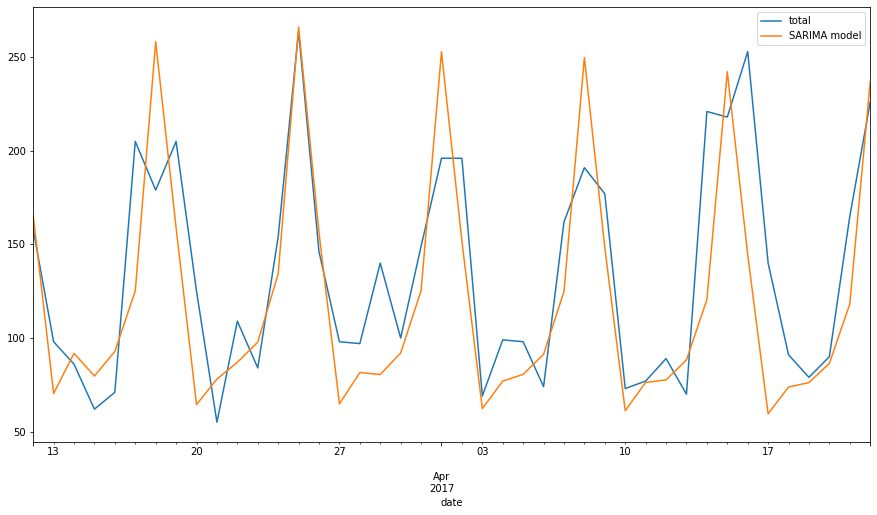

In [36]:
test['total'].plot(legend=True,figsize=(15,8))
predictions.plot(legend=True)

In [37]:
#SARIMAX model

In [38]:
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7).summary( )

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2348.679
Date:                           Sun, 19 Apr 2020   AIC                           4709.359
Time:                                   13:33:14   BIC                           4734.377
Sample:                                        0   HQIC                          4719.195
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5586      4.273      2.705      0.007       3.184      19.934
x1            74.8467      4.546     16.463      0.000      65.936      83.757
ma.L1          0.1782      0.051      3.475      0.001       0.078       0.279
ar.S.L7        0.5058      0.045     11.228      0.000       0.418       0.594
ar.S.L14       0.3842      0.043      8.980      0.000       0.300       0.468
sigma2      1142.1098     80.202     14.240      0.000     984.917    1299.303
===================================================================================
Ljung-Box (Q):                       85.03   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model = SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [43]:
result = model.fit()

In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2135.227
Date:                           Sun, 19 Apr 2020   AIC                           4282.455
Time:                                   13:48:40   BIC                           4306.920
Sample:                               01-01-2016   HQIC                          4292.110
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday      101.6098      4.959     20.490      0.000      91.890     111.329
ar.L1          0.9998      0.000   3986.355      0.000       0.999       1.000
ma.L1         -1.2994      0.050    -25.920      0.000      -1.398      -1.201
ar.S.L7        0.9998      0.000   2269.640      0.000       0.999       1.001
ma.S.L7       -0.9611      0.037    -25.716      0.000      -1.034      -0.888
sigma2       734.3622     65.875     11.148      0.000     605.250     863.475
===================================================================================
Ljung-Box (Q):                       59.71   Jarque-Bera (JB):                48.48
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.32
Prob(H) (two-sided):                  0.66   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
start = len(train)
end = len(train) + len(test) - 1

In [46]:
predictions2 = result.predict(start,end,exog=test[['holiday']]).rename('SARIMAX with exog')

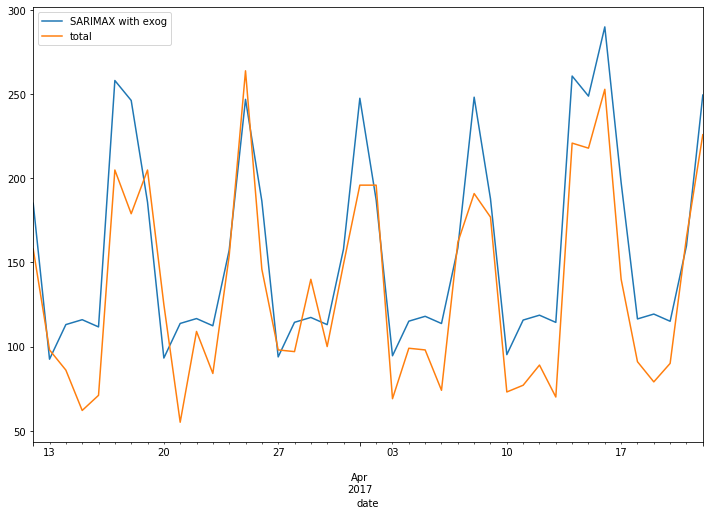

In [47]:
predictions2.plot(figsize=(12,8),legend=True)
test['total'].plot(legend=True)

In [48]:
from statsmodels.tools.eval_measures import rmse,mse 

In [50]:
rmse(test['total'], predictions2)

33.37320120943605

In [53]:
model = SARIMAX(df1['total'],exog=df1[['holiday']],order=(1,0,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [55]:
results = model.fit()

In [59]:
#exog forecast
exog_forecast = df[478:][['holiday']]

In [61]:
fcast = results.predict(len(df1),len(df1)+38,exog=exog_forecast).rename('FINAL SARIMAX FORECAST')

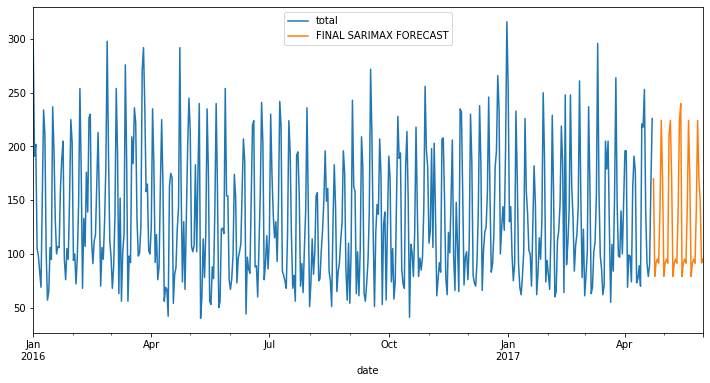

In [62]:
df1['total'].plot(figsize=(12,6),legend=True)
fcast.plot(legend=True)